Project
===

Collaborator 1 – Data Understanding & Cleaning
===

First of all we start loading the data

In [1]:
import pandas as pd

df = pd.read_csv("../data/coronary_disease.csv")
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Now we are going to **inspect the dataset** 

In [2]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)


Shape: (4238, 16)

Dtypes:
 sex                 object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


We are observing that our dataset has 4238 samples with 16 labels. Most of the labels are integer or float (numeric) whereas sex and currentSmoker are object type

After that, we will check if some columns have NA values:

In [3]:
print("\nMissing per column:\n", df.isna().sum())


Missing per column:
 sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


We are observing that columns education,cigsPerDay,BPMeds,totChol,BMI,heartRate and glucose have NA values.

Finally, we are going to see the class balance for variable TenYearCHD

In [4]:
print("\nClass balance (TenYearCHD):\n", df['TenYearCHD'].value_counts(normalize=True))



Class balance (TenYearCHD):
 TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64


We are observing that most of the patients did not develop coronary disease within 10 years (85% for NO and 15% for Yes)

**Renaming Variables**

As we are working 7 members in the project it is good to rename the variable names to a more understandable ones. This ensures that every member understands the variable they are using

In [5]:
rename_map = {
        "sex": "sex",
        "age": "age",
        "education": "education_level",
        "currentSmoker": "current_smoker",
        "cigsPerDay": "cigs_per_day",
        "BPMeds": "bp_meds",
        "prevalentStroke": "prevalent_stroke",
        "prevalentHyp": "prevalent_hypertension",
        "diabetes": "diabetes",
        "totChol": "total_cholesterol",
        "sysBP": "systolic_bp",
        "diaBP": "diastolic_bp",
        "BMI": "bmi",
        "heartRate": "heart_rate",
        "glucose": "glucose",
        "TenYearCHD": "ten_year_chd",
    }
df = df.rename(columns=rename_map)
df.head()


,sex,age,education_level,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Removing NA**

As previously seen, some variables have NA values.


In [6]:
df[df.isna().any(axis=1)].groupby("ten_year_chd").size() / df.groupby("ten_year_chd").size()

ten_year_chd
0    0.137730
1    0.135093
dtype: float64

13% of samples with label 0 are NA

13% of samples with label 1 are NA

In [7]:
df.isna().any(axis=1).sum()


np.int64(582)

As we can see in the code above, if we remove the samples with NA from label 0 and label 1, we don't produce a class imbalance as we are removing the same proportion of samples.
Also, we have 4238 samples so by removing 582 of them we are still having a lot of samples

In [8]:
df = df.dropna().reset_index(drop=True)
print("Shape after removing NAs:", df.shape)


Shape after removing NAs: (3656, 16)


**Analyzing impossible values**

Now we are going to analyze impossible values such as negative age, bmi, cholesterol level...

In [9]:
import pandas as pd

checks = {
    "age_nonpositive": (df["age"] <= 0).sum(),
    "bmi_nonpositive": (df["bmi"] <= 0).sum(),
    "chol_nonpositive": (df["total_cholesterol"] <= 0).sum(),
    "glucose_nonpositive": (df["glucose"] <= 0).sum(),
    "sysbp_nonpositive": (df["systolic_bp"] <= 0).sum(),
    "diabp_nonpositive": (df["diastolic_bp"] <= 0).sum(),
}

checks_table = pd.DataFrame(
    checks.items(),
    columns=["check", "count"]
)

checks_table


,check,count
0,age_nonpositive,0
1,bmi_nonpositive,0
2,chol_nonpositive,0
3,glucose_nonpositive,0
4,sysbp_nonpositive,0
5,diabp_nonpositive,0


No negative (impossible) values are found

**Analyzing outliers**

We are going to create a boxplot per variable to clearly see the outliers.
Note: Outliers are the dots that are outside the box.

Explanation:

-Box = Q1 to Q3

-Whiskers = values within 1.5 × IQR

-Dots = values < Q1 − 1.5·IQR or > Q3 + 1.5·IQR


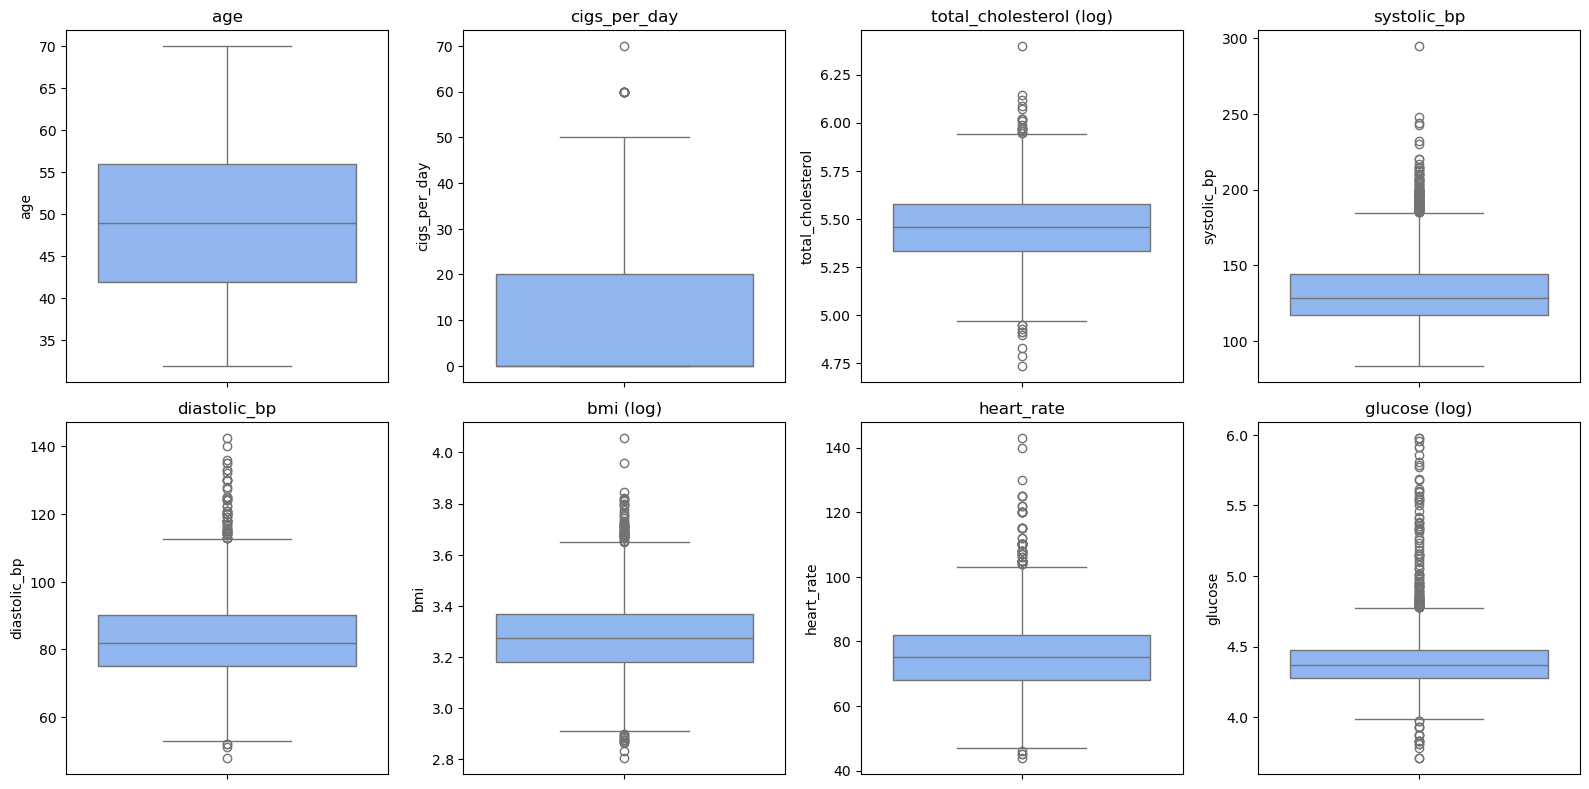

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

log_cols = ["total_cholesterol", "bmi", "glucose"]
num_cols = ["age","cigs_per_day","total_cholesterol","systolic_bp",
            "diastolic_bp","bmi","heart_rate","glucose","cigs_per_day"]

df_plot = df.copy()
for col in log_cols:
    df_plot[col] = np.log1p(df_plot[col])  

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(y=df_plot[col], ax=ax, color="#7fb3ff")
    ax.set_title(col + (" (log)" if col in log_cols else ""))
plt.tight_layout()
plt.show()



In the boxplots above we applied logarithm to some variables that had huge values so by applying the log it is more easy to visualize the. As we can see, all samples (except age) have dots in their boxplots, meaning outliers.

To see it in numbers we are going to do the same reasoning as before

In [11]:
num_cols = ["age","cigs_per_day","total_cholesterol","systolic_bp",
            "diastolic_bp","bmi","heart_rate","glucose"]

rows = []
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    rows.append({
        "feature": col,
        "low_outliers": (df[col] < lower).sum(),
        "high_outliers": (df[col] > upper).sum(),
        "lower_fence": lower,
        "upper_fence": upper,
    })

iqr_table = pd.DataFrame(rows).set_index("feature")
print(iqr_table)

                   low_outliers  high_outliers  lower_fence  upper_fence
feature                                                                 
age                           0              0       21.000       77.000
cigs_per_day                  0             10      -30.000       50.000
total_cholesterol             2             44      120.125      349.125
systolic_bp                   0            108       76.500      184.500
diastolic_bp                  4             65       52.500      112.500
bmi                           1             84       15.640       35.480
heart_rate                    4             76       47.000      103.000
glucose                       9            166       47.000      111.000


We are seeing that variables as glucose or systolic_bp have more outliers than the others, however, with 3656 samples, this number of outliers is small to deal with it and is expected for clinical variables. As a result, we are not removing any sample

**Summary**

We loaded the coronary dataset, which contains 4,238 rows and 16 columns, and observed that the target variable is imbalanced, with approximately 15% positive cases. To improve clarity and avoid misunderstandings among collaborators, we renamed the variables using more descriptive names. We then removed around 500 rows containing missing values. After cleaning the data, we checked for negative values in variables where they are not physiologically plausible. Finally, we explored the presence of outliers using boxplots and interquartile range (IQR) calculations.

# Collaborator 2 – Feature Engineering & EDA

Goal: Turn raw variables into model-ready features and understand patterns.

Input:
* Cleaned DataFrame fromm collaborator 1

Tasks:
* Encode categorical variables (sex, smoker, binary medical variables).
* Decide whether ordinal variables (education) need special handling.
* Engineer simple derived features 
* Produce plots: CHD vs age, BP, cholesterol, BMI, glucose,...
* Check separability between CHD and non-CHD cases.

Deliverables:
* Feature-engineered DataFrame
* EDA plots with brief observations

# Biologicaly imposible values

The different variables will be checked again for impossible values. This time we do it specefically for the different values, checking boundaries found in the literature. 

| Feature              | Impossible values (living human) |
|----------------------|----------------------------------|
| age                  | ≤ 0, > 120                       |
| cigs_per_day         | < 0, > 100                       |
| total_cholesterol    | ≤ 0, > 1000                      |
| systolic_bp          | < 50 or > 300                    |
| diastolic_bp         | < 30 or > 200                    |
| bmi                  | ≤ 0, > 80                        |
| heart_rate           | < 20 or > 300                    |
| glucose              | < 20 or > 1000                   |


In [12]:
df.describe()  

,age,education_level,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,1.979759,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,8.561133,1.022657,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


All values are biologically possible.

### Identify variable types
we checked this before but now we focus on the types for our next step.

In [13]:
print("\nDtypes:\n", df.dtypes)


Dtypes:
 sex                        object
age                         int64
education_level           float64
current_smoker             object
cigs_per_day              float64
bp_meds                   float64
prevalent_stroke            int64
prevalent_hypertension      int64
diabetes                    int64
total_cholesterol         float64
systolic_bp               float64
diastolic_bp              float64
bmi                       float64
heart_rate                float64
glucose                   float64
ten_year_chd                int64
dtype: object


We have the following variables:

Binary:
* sex, current_smoker, bp_meds, prevalent_stroke, prevalent_hypertension, diabetes, ten_year_chd

Continuous:
* age, bmi, systolic_bp, diastolic_bp, total_cholesterol, glucose, herat_rate, cigs_per_day

Ordinal:
* education_level
* this is treated as an ordinal variable and kept as an integer encoding.

Now we will adjust the type of the data, so the objects become also binary int64:

In [14]:
#change sex to binary
# Convert to string first
df["sex"] = df["sex"].astype(str)
# Replace values
df["sex"] = df["sex"].replace({"F": 0, "M": 1})
# Convert to nullable integer type (Int64) which handles NaN
df["sex"] = df["sex"].astype("Int64")#

#change current_smoker to binary
# Convert to string first
df["current_smoker"] = df["current_smoker"].astype(str)
# Replace values
df["current_smoker"] = df["current_smoker"].replace({"Yes": 1, "No": 0})
# Convert to nullable integer type (Int64) which handles NaN
df["current_smoker"] = df["current_smoker"].astype("Int64")

/tmp/ipykernel_937554/3268607840.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"F": 0, "M": 1})
/tmp/ipykernel_937554/3268607840.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["current_smoker"] = df["current_smoker"].replace({"Yes": 1, "No": 0})


In [15]:
print("\nDtypes:\n", df.dtypes)


Dtypes:
 sex                         Int64
age                         int64
education_level           float64
current_smoker              Int64
cigs_per_day              float64
bp_meds                   float64
prevalent_stroke            int64
prevalent_hypertension      int64
diabetes                    int64
total_cholesterol         float64
systolic_bp               float64
diastolic_bp              float64
bmi                       float64
heart_rate                float64
glucose                   float64
ten_year_chd                int64
dtype: object


Binary categorical variables such as sex and current_smoker were encoded as 0/1 instead of being kept as objects. Most predictive models require numeric inputs. Using a binary numeric encoding makes these variables immediately model-ready. While categorical dtypes are useful for semantics and memory efficiency, explicit numeric encoding is required for downstream modeling. Now all variable are numeric.

We check if all binary variables are binary:

In [16]:
binary_cols = [
    "sex", "current_smoker", "bp_meds",
    "prevalent_stroke", "prevalent_hypertension",
    "diabetes", "ten_year_chd"
]

df[binary_cols].nunique()


sex                       2
current_smoker            2
bp_meds                   2
prevalent_stroke          2
prevalent_hypertension    2
diabetes                  2
ten_year_chd              2
dtype: int64

### Feature engineering

We create a simple smoker intensity feature. 
This feature distinguishes non-smokers from light and heavy smokers:

In [17]:
df["smoker_intensity"] = (
    df["current_smoker"] * df["cigs_per_day"]
)
df.head()

,sex,age,education_level,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd,smoker_intensity
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,20.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,30.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,23.0


Additionally, we create he feature of pulse pressure with the systolic and diastolic BP:

In [18]:
df["pulse_pressure"] = df["systolic_bp"] - df["diastolic_bp"]
df.head()

,sex,age,education_level,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd,smoker_intensity,pulse_pressure
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0,36.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0,40.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,20.0,47.5
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,30.0,55.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,23.0,46.0


### EDA plots
First  we will plot the target variable ten_year_chd vs continuous variables:

ERROR! Session/line number was not unique in database. History logging moved to new session 44


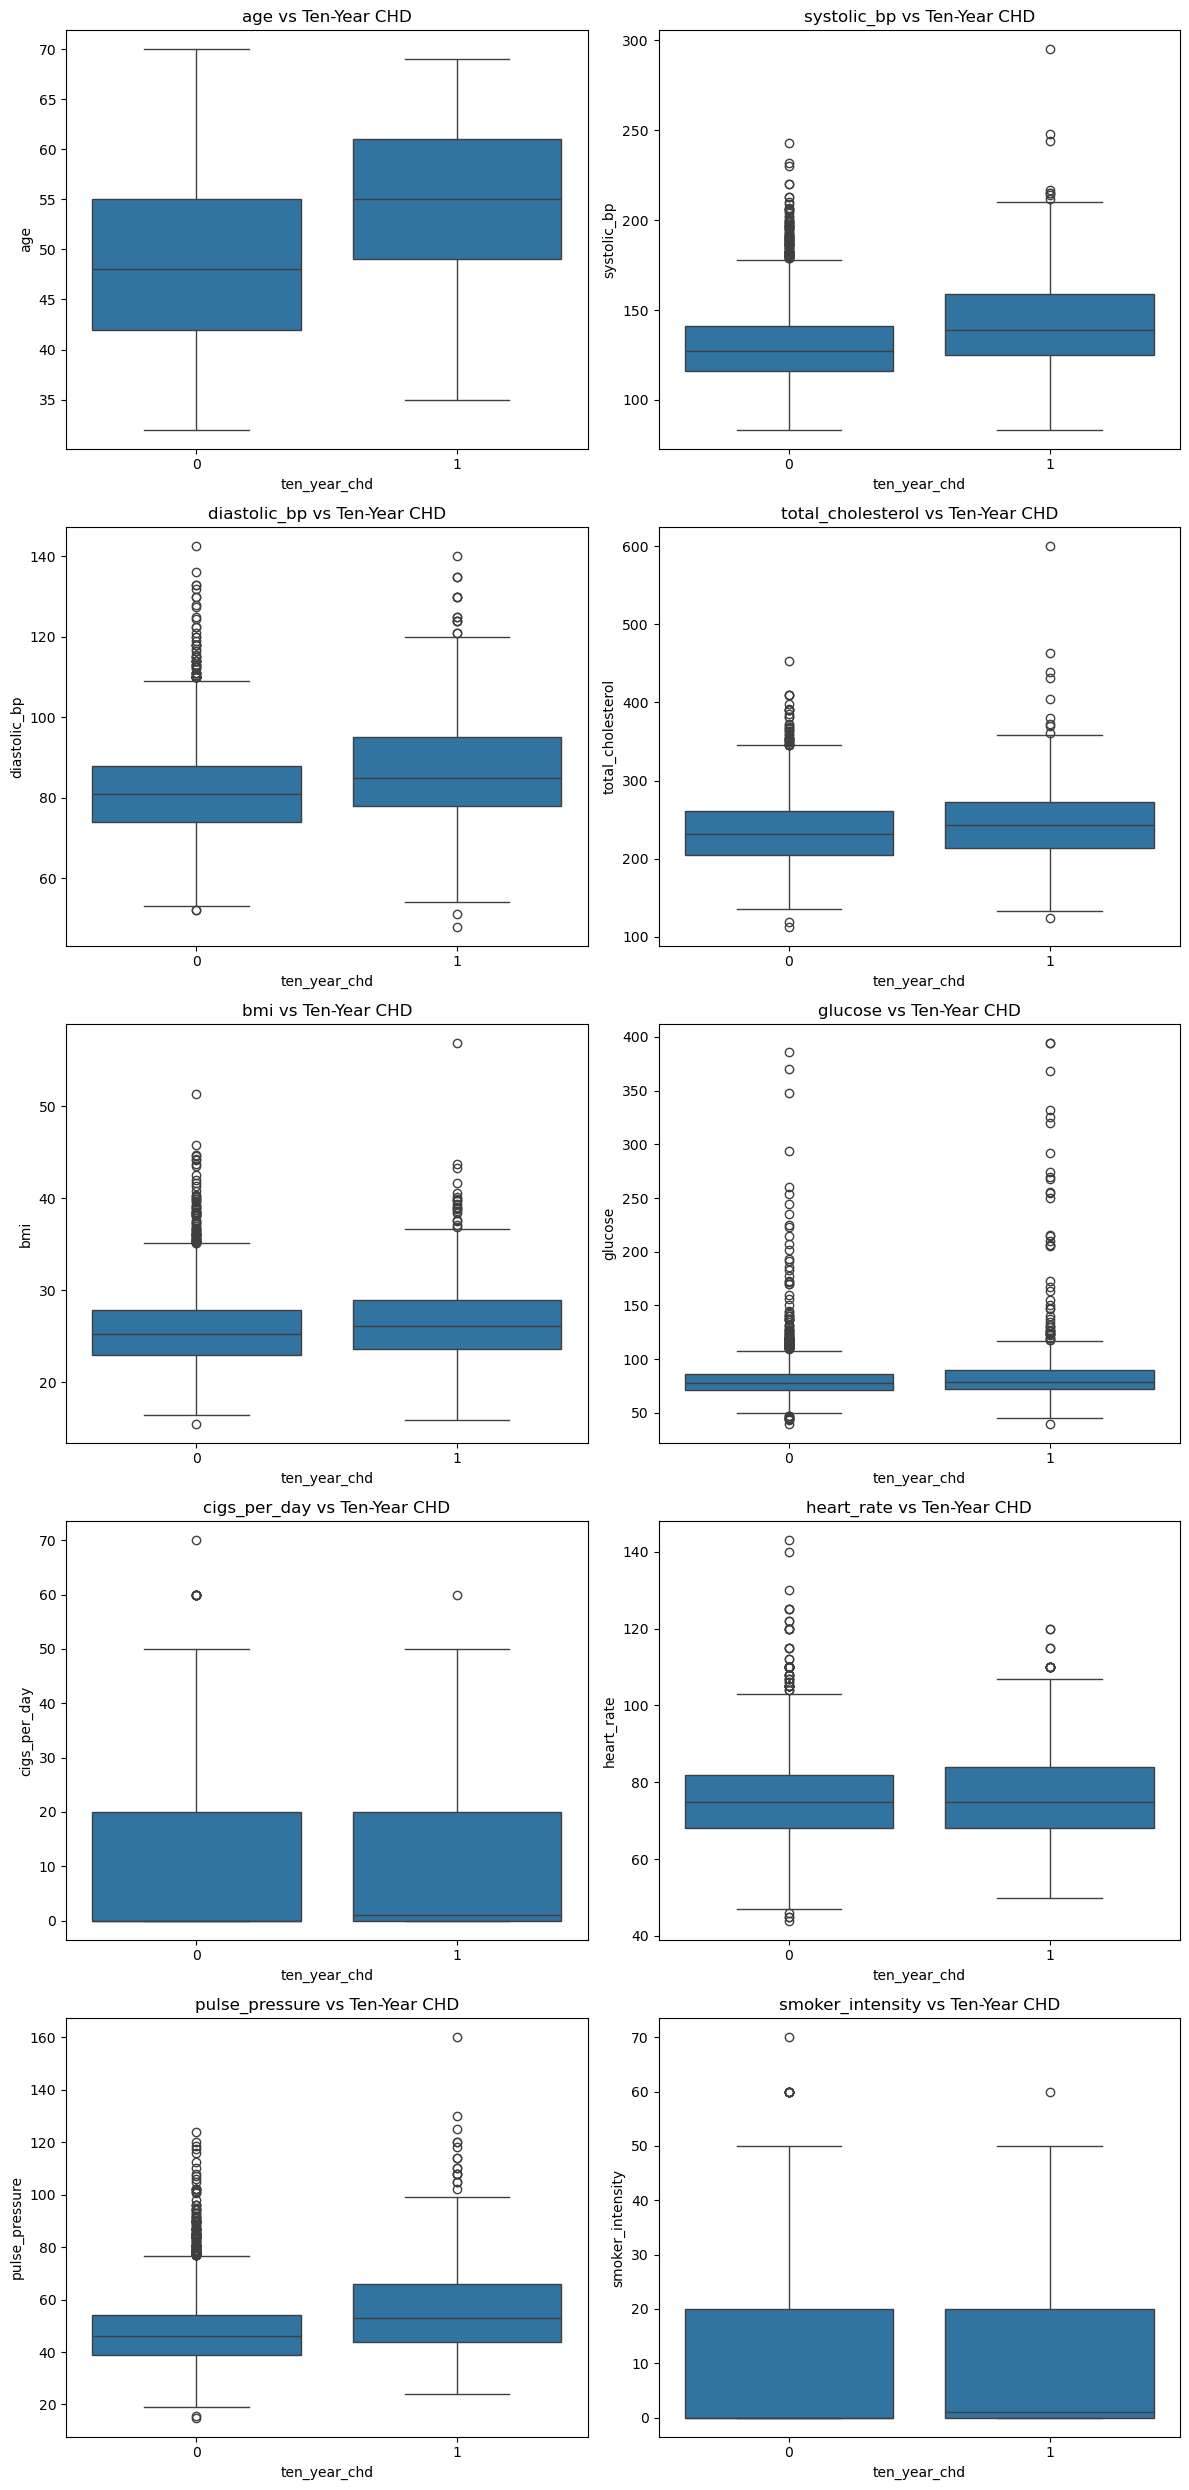

In [19]:
features = [
    "age", "systolic_bp", "diastolic_bp",
    "total_cholesterol", "bmi", "glucose", "cigs_per_day", "heart_rate",
    "pulse_pressure", "smoker_intensity"
]

# Calculate number of rows needed (3 columns, so ceil(8/3) = 3 rows)
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots: 3 columns, smaller figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for idx, col in enumerate(features):
    sns.boxplot(x="ten_year_chd", y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f"{col} vs Ten-Year CHD")

# Hide unused subplots if any
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


#### Key Observations:
Individuals who developed ten-year coronary heart disease (CHD) tend to be older than those who did not, showing a clear shift toward higher ages in the CHD group. Systolic blood pressure, diastolic blood and pulse pressure are also generally higher among CHD cases, although substantial overlap exists between groups. Body mass index (BMI) and glucose levels show slightly higher medians in the CHD group but with strong overlap, suggesting limited separability when considered individually. Total cholesterol displays only modest differences between groups, indicating weak standalone discriminatory power. Smoking intensity (cigarettes per day) and heart rate show minimal differences between CHD and non-CHD groups, suggesting a weaker univariate association with CHD status.
Overall, age and pulse, diastolic and systolic blood pressure appear to be the most informative variables in distinguishing CHD from non-CHD cases, while most other features show considerable overlap and are likely to contribute mainly in combination within multivariable models.

Now we will aslo check the binary and ordinal variables:
 

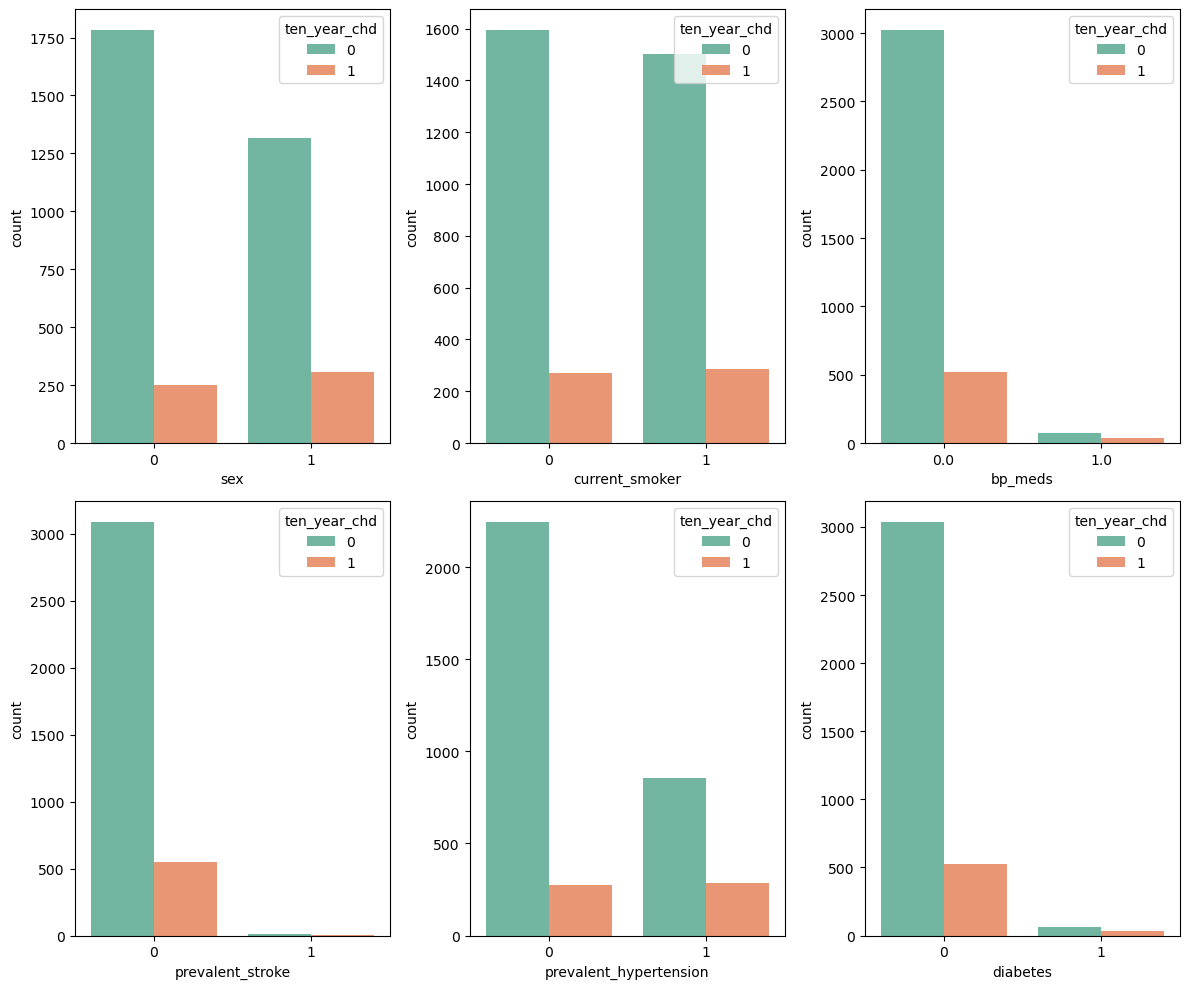

In [20]:
#binary variables
features = [
    "sex", "current_smoker", "bp_meds",
    "prevalent_stroke", "prevalent_hypertension",
    "diabetes"
]

# Calculate number of rows needed (3 columns, so ceil(8/3) = 3 rows)
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots: 3 columns, smaller figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for idx, col in enumerate(features):
    ax = axes[idx]
    order = df[col].cat.categories if hasattr(df[col], "cat") else None
    sns.countplot(data=df, x=col, hue="ten_year_chd", order=order, palette="Set2", ax=ax)

# Hide unused subplots if any
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


#### Key observations:

Male (1) participants show a higher proportion of ten-year CHD cases compared to females (0). Current smokers (1) exhibit a slightly higher occurrence of CHD than non-smokers (0), although the difference is moderate. Individuals taking blood pressure medication (1) and those with prevalent hypertension (1) show a higher proportion in the group of CHD cases, indicating a association with cardiovascular risk. Diabetes is also associated with a higher relative frequency of CHD, despite its lower prevalence in the dataset. Prevalent stroke is rare and shows limited discriminatory power due to the small number of affected individuals.
Overall, medical history variables related to hypertension and diabetes appear more informative for CHD risk than lifestyle factors when considered individually.

### Check separability between CHD and non-CHD cases
Among the variables examined, age systolic blood pressure and pulse pressure show the strongest univariate separation between CHD and non-CHD cases. Other continuous variables such as BMI, glucose, and diastolic blood pressure exhibit weaker separation with substantial overlap, while cholesterol, smoking intensity, and heart rate provide little standalone discriminatory power. Categorical medical history variables suggest associations with CHD but do not yield clear separability on their own.

We will create 2 KDE plots to observe more details about the age and systolic BP:

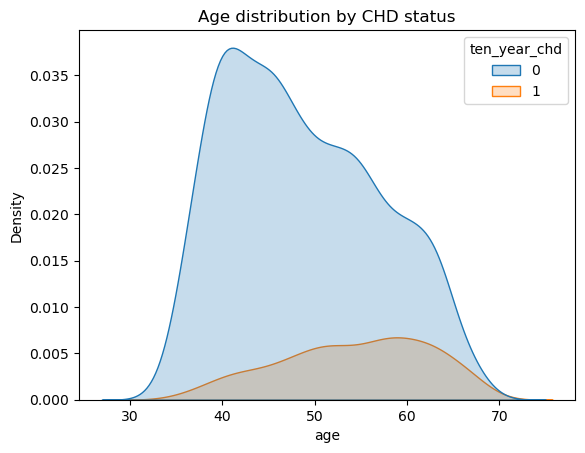

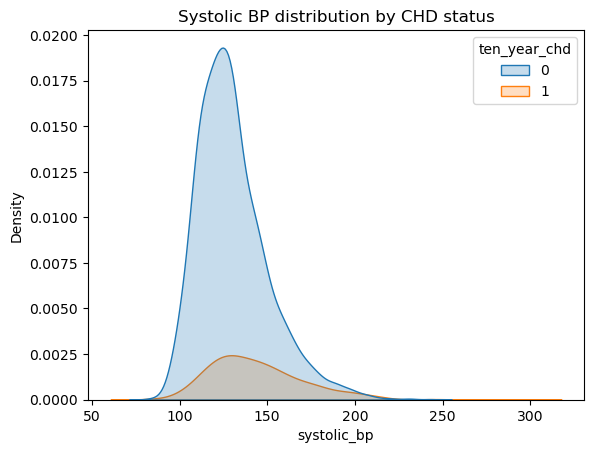

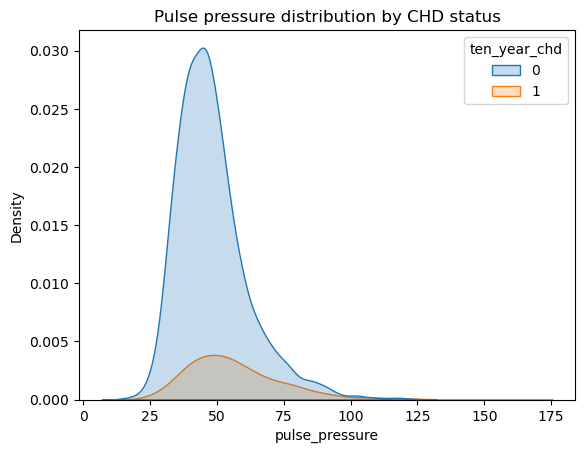

In [21]:
#KDE plot of age
sns.kdeplot(data=df, x="age", hue="ten_year_chd", fill=True)
plt.title("Age distribution by CHD status")
plt.show()

#KDE plot of systolic BP
sns.kdeplot(data=df, x="systolic_bp", hue="ten_year_chd", fill=True)
plt.title("Systolic BP distribution by CHD status")
plt.show()

#KDE plot of pulse pressure
sns.kdeplot(data=df, x="pulse_pressure", hue="ten_year_chd", fill=True)
plt.title("Pulse pressure distribution by CHD status")
plt.show()


#### Key observation:

All plots exhibit right-shifted distributions for CHD cases, indicating moderate separability; however, substantial overlap between CHD and non-CHD groups suggests that neither variable alone is sufficient for clear discrimination.

### Summary - Feature Engineering & EDA

Two derived features were created to capture clinically meaningful information beyond the raw variables. Smoker intensity was defined as the product of current smoking status and the number of cigarettes smoked per day, allowing differentiation between non-smokers, light smokers, and heavy smokers, while assigning zero exposure to non-smokers. Pulse pressure was computed as the difference between systolic and diastolic blood pressure and serves as an indicator of arterial stiffness and cardiovascular risk. These engineered features aim to incorporate interaction effects and physiological relationships that may not be fully captured by individual variables alone.

Exploratory data analysis was conducted to examine the relationship between baseline characteristics and ten-year coronary heart disease (CHD) status. Age, pulse pressure and systolic blood pressure show the strongest univariate associations with CHD, with distributions for CHD cases shifted toward higher values compared to non-CHD cases. However, substantial overlap remains, indicating only moderate separability when these variables are considered individually. Other continuous variables, including diastolic blood pressure, body mass index, glucose, and total cholesterol, exhibit weaker differences and considerable overlap between groups. Categorical variables such as sex, prevalent hypertension, blood pressure medication use, and diabetes suggest associations with CHD risk, although small subgroup sizes and class imbalance limit their standalone discriminatory power. Overall, no single variable clearly separates CHD from non-CHD cases, highlighting the need for multivariable modeling to capture combined effects.

# Collaborator 3 – Normalization & Correlation

Goal: Prepare features for stable and interpretable modeling.

Input:
* Original DataFrame from Collaborator 2

Tasks:
* Normalize numerical variables (z-score or min-max).
* Compute correlation matrix.
* Identify highly correlated features (e.g., sysBP vs diaBP).
* Propose which features to keep or remove.
* Finalize clean feature list.

Deliverables:
* Normalized dataset
* Correlation analysis summary
* Final feature set recommendation

---
### 1. Data context and column grouping

Before applying any transformation, it is essential to define the types of variables in the DataFrame.  
This allows us to decide which columns should be normalized and which should not:

- **Continuous:** numerical variables with a wide range (age, blood pressure, cholesterol, glucose, etc.).  
- **Binary:** categorical variables encoded as 0/1 (sex, smoker, hypertension, diabetes, etc.).  
- **Ordinal:** variables with ordered categories (education level).  

In addition, we will work on a **copy of the DataFrame** (`df_work`) to avoid modifying the original dataset from Collaborator 2.  
This step ensures reproducibility and prevents errors if we need to return to the initial state.


In [22]:
# Copy of work to avoid modifying the original df
df_work = df.copy()

# Define feature groups
num_cols = [
    "age", "bmi", "systolic_bp", "diastolic_bp", "total_cholesterol",
    "glucose", "heart_rate", "cigs_per_day", "pulse_pressure", "smoker_intensity"
]

binary_cols = [
    "sex", "current_smoker", "bp_meds",
    "prevalent_stroke", "prevalent_hypertension", "diabetes"
]

ordinal_cols = ["education_level"]

target_col = "ten_year_chd"

# 3. First check: verify that all expected columns exist
expected_cols = set(num_cols + binary_cols + ordinal_cols + [target_col])
missing_cols = expected_cols - set(df_work.columns)
assert len(missing_cols) == 0, f"Missing columns: {missing_cols}"

# 4. Second check: ensure numerical columns are numeric
df_work[num_cols] = df_work[num_cols].apply(pd.to_numeric, errors="coerce")

# 5. Third check: check for missing values before normalization
df_work[num_cols].isna().sum()

age                  0
bmi                  0
systolic_bp          0
diastolic_bp         0
total_cholesterol    0
glucose              0
heart_rate           0
cigs_per_day         0
pulse_pressure       0
smoker_intensity     0
dtype: int64

#### **Feedback of the output:**
No missing values were found in the numerical variables, so the dataset is ready for normalization.


---
### 2. Normalization of continuous variables

To ensure comparability across features and avoid scale dominance, we normalize all continuous variables.  
We apply **z-score normalization (mean = 0, standard deviation = 1)** to continuous columns.  
Binary and ordinal variables remain unchanged to preserve their categorical meaning.


#### **Why we use z-score normalization**

Using z-score normalization is appropriate here because:

- **It prevents scale dominance:** clinical variables such as cholesterol, glucose, BMI or blood pressure operate on very different numeric ranges. Standardization ensures that no variable disproportionately influences correlations or downstream models simply due to its scale.
- **It improves numerical stability:** many algorithms (e.g., logistic regression, SVMs, k-NN, neural networks) perform better when features are centered and scaled.
- **It preserves distribution shape:** unlike min–max scaling, z-score does not compress values into a fixed interval, keeping outliers and variability clinically interpretable.
- **It aligns with clinical reasoning:** expressing values in terms of “how many standard deviations from the mean” is intuitive and consistent with clinical thresholds (e.g., unusually high glucose or blood pressure).

Binary and ordinal variables are left unchanged because scaling them would remove their categorical meaning.

In [23]:
# First we will check the summary of continuous variables before normalization
df_work[num_cols].describe().round(2)


,age,bmi,systolic_bp,diastolic_bp,total_cholesterol,glucose,heart_rate,cigs_per_day,pulse_pressure,smoker_intensity
count,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.0
mean,49.56,25.78,132.37,82.91,236.87,81.86,75.73,9.02,49.46,9.02
std,8.56,4.07,22.09,11.97,44.10,23.91,11.98,11.92,14.67,11.92
min,32.00,15.54,83.50,48.00,113.00,40.00,44.00,0.00,15.00,0.0
25%,42.00,23.08,117.00,75.00,206.00,71.00,68.00,0.00,40.00,0.0
50%,49.00,25.38,128.00,82.00,234.00,78.00,75.00,0.00,47.00,0.0
75%,56.00,28.04,144.00,90.00,263.25,87.00,82.00,20.00,56.00,20.0
max,70.00,56.80,295.00,142.50,600.00,394.00,143.00,70.00,160.00,70.0


In [24]:
# We apply z-score normalization to all continuous variables to ensure they share a comparable scale before correlation analysis and modeling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_work[num_cols] = scaler.fit_transform(df_work[num_cols])

# Quick check: mean ~0, std ~1 after normalization
df_work[num_cols].agg(["mean", "std"]).round(2)


,age,bmi,systolic_bp,diastolic_bp,total_cholesterol,glucose,heart_rate,cigs_per_day,pulse_pressure,smoker_intensity
mean,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### **Feedback on normalization output**

After applying **StandardScaler** to the continuous variables, we verified the transformation by checking the post-normalization means and standard deviations.  
All continuous features now show **mean ≈ 0** and **standard deviation ≈ 1**, confirming that the z-score normalization was applied correctly and that the variables are now on a comparable scale.


#### **What is StandardScaler?**

`StandardScaler` is a preprocessing tool from **scikit-learn** that applies **z-score normalization** to numerical variables.  
Each value **x** is transformed as:

**z=(x-mu)/sigma**


where **mu** is the mean and **sigma** is the standard deviation of the variable.

#### **Why use it?**
- **Comparability**: puts all continuous variables on the same scale.  
- **Model stability**: many algorithms (logistic regression, SVM, PCA, neural networks) perform better when inputs are standardized.  
- **Interpretability**: values represent how many standard deviations a data point is above or below the mean.  
- **Avoid dominance**: prevents variables with large ranges (e.g., cholesterol in mg/dL) from overshadowing smaller-scale variables (e.g., BMI).

In summary, StandardScaler ensures that continuous features contribute equally to the model and improves both interpretability and performance.


---
### 3. Correlation analysis

After normalization, we compute the correlation matrix to identify relationships between variables.  
This step helps us detect redundant features that carry overlapping information.  
We will focus on pairs with correlation coefficients |r| ≥ 0.8, as these indicate strong linear dependence.  
Highly correlated features may be candidates for removal to improve model stability and interpretability.


##### **Clinical note on correlation threshold (≥ 0.8)**

In clinical data analysis, a correlation coefficient |r| ≥ 0.8 is considered very strong.  
This means two variables move almost together, often reflecting overlapping physiological information.  
For example, **systolic and diastolic blood pressure** are highly correlated because both measure arterial pressure.  
Keeping both in a model may add redundancy without improving predictive power.  
Therefore, we mark pairs with |r| ≥ 0.8 as candidates for reduction, keeping the variable with clearer clinical meaning.


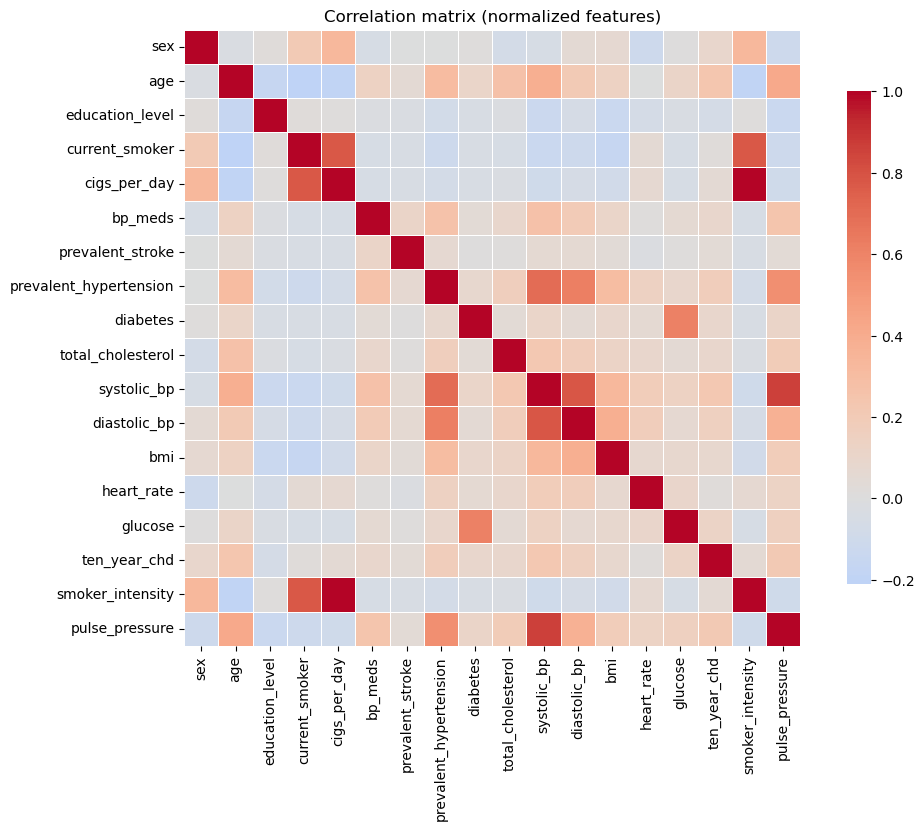

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute correlation matrix
corr = df_work.corr()

# 2. Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation matrix (normalized features)")
plt.show()


In [26]:
# Extract highly correlated pairs (|r| ≥ 0.8), excluding self-correlations
threshold = 0.8
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

high_corr_pairs = (
    upper.stack()
         .rename("r")
         .reset_index()
         .sort_values("r", ascending=False)
)

high_corr_pairs = high_corr_pairs[high_corr_pairs["r"].abs() >= threshold]

high_corr_pairs


,level_0,level_1,r
73,cigs_per_day,smoker_intensity,1.000000
131,systolic_bp,pulse_pressure,0.863769


#### **Feedback on correlation outputs**

After computing the correlation matrix, we identified two pairs of variables with very strong linear relationships (|r| ≥ 0.8):

- **cigs_per_day vs smoker_intensity**:  r = 1.00  
  This is expected, as `smoker_intensity` is a derived feature:  
  

  *smoker_intensity = current_smoker × cigs_per_day*

  
  Since `current_smoker` is binary (0 or 1), `smoker_intensity` is a masked version of `cigs_per_day`.  
  → We will **keep `smoker_intensity`** and **drop `cigs_per_day`**, as the derived feature captures exposure more meaningfully.

- **systolic_bp vs pulse_pressure**: r ≈ 0.86  
  This reflects physiological overlap: `pulse_pressure` is defined as:  
  

  *pulse_pressure = systolic_bp – diastolic_bp*

  
  Despite the correlation, both variables may carry complementary clinical information.  
  → We will **keep both** for now, pending model performance evaluation.

These decisions aim to reduce redundancy while preserving interpretability and clinical relevance.


---
### 4. Feature selection and dataset export

Based on the correlation analysis, we decided to remove redundant variables:

- **Drop `cigs_per_day`** → fully captured by `smoker_intensity`.  
- **Keep both `systolic_bp` and `pulse_pressure`** → despite their correlation, they provide complementary clinical information.  

This step reduces redundancy while preserving interpretability and clinical relevance.  
Finally, we export the cleaned dataset for downstream modeling and analysis.


In [27]:
# First we remove redundant features to reduce multicollinearity and simplify the model.
#--------------------------------------------------------------------------------------------
# Feature selection: drop redundant variable
cleaned_df = df_work.drop(columns=["cigs_per_day"])

# Quick check: confirm column removal
assert "cigs_per_day" not in cleaned_df.columns

# Showing final shape and columns
print("Cleaned dataset shape:", cleaned_df.shape)
print("Final columns:", cleaned_df.columns.tolist())



Cleaned dataset shape: (3656, 17)
Final columns: ['sex', 'age', 'education_level', 'current_smoker', 'bp_meds', 'prevalent_stroke', 'prevalent_hypertension', 'diabetes', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'smoker_intensity', 'pulse_pressure']


In [28]:
# Second we document which features were removed to ensure full transparency in the selection process.
removed = set(df_work.columns) - set(cleaned_df.columns)
print("Removed features:", removed)


Removed features: {'cigs_per_day'}


In [29]:
# Third we store the final feature list to define the input matrix for modeling.
final_features = cleaned_df.columns.tolist()
final_features


['sex',
 'age',
 'education_level',
 'current_smoker',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hypertension',
 'diabetes',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose',
 'ten_year_chd',
 'smoker_intensity',
 'pulse_pressure']

In [30]:
# Finally we check that only one strong correlation remains (systolic_bp & blood_pressure)
# This is expected and justified, so both variables are retained.
#--------------------------------------------------------------------------------
corr_final = cleaned_df.corr()
upper_final = corr_final.where(np.triu(np.ones(corr_final.shape), k=1).astype(bool))

# Stack first, then filter
high_corr_final = (
    upper_final
        .stack()
        .rename("r")
        .reset_index()
        .query("abs(r) >= 0.8")
        .sort_values("r", ascending=False)
)

high_corr_final



,level_0,level_1,r
114,systolic_bp,pulse_pressure,0.863769


#### **Feedback on the final cleaned dataset**

##### **Dataset dimensions**

**Cleaned dataset shape: (3656, 17)**  
The final dataset preserves all **3656 original observations**, confirming that the cleaning and feature‑selection steps did not remove any rows or introduce data loss.  
The final count of **17 variables** reflects the correct removal of the single redundant feature (`cigs_per_day`).



##### **Final variables included**

The dataset now contains the following columns:

- **Demographic variables:**  
  `sex`, `age`, `education_level`

- **Lifestyle factors:**  
  `current_smoker`, `smoker_intensity`

- **Clinical variables:**  
  `bp_meds`, `prevalent_stroke`, `prevalent_hypertension`, `diabetes`,  
  `total_cholesterol`, `systolic_bp`, `diastolic_bp`,  
  `bmi`, `heart_rate`, `glucose`, `pulse_pressure`

- **Target variable:**  
  `ten_year_chd`

These 17 features match exactly the final feature list extracted from the cleaned dataset.



##### **Interpretation**

- The removal of `cigs_per_day` is fully justified, as its information is already captured by the more informative feature `smoker_intensity`.  
- A final correlation check shows that only one strong correlation remains:  
  **systolic_bp ↔ pulse_pressure (r = 0.86)**.  
  This relationship is clinically expected, since pulse pressure is derived from systolic and diastolic blood pressure.  
  Both variables are retained because they provide **complementary and clinically meaningful information**.
- The final dataset is **clean, normalized, and minimally redundant**, ensuring a stable and interpretable foundation for downstream modeling.





---
### Summary - Normalization & Correlation

The continuous variables were standardized using z‑score normalization to ensure that all features operated on a comparable scale (mean ≈ 0, standard deviation ≈ 1). This step stabilizes distance‑based relationships, prevents scale‑driven dominance in correlation analysis, and prepares the dataset for interpretable modeling. A pre‑normalization summary confirmed the heterogeneity of the original scales, while post‑normalization checks validated that the transformation was applied correctly across all numerical variables.

A full correlation matrix and heatmap were computed to identify linear dependencies between predictors. Several moderate correlations were observed, and one strong relationship emerged between systolic blood pressure and pulse pressure (r = 0.86). This association is clinically expected, as pulse pressure is derived from systolic and diastolic blood pressure. Beyond this physiological dependency, no additional pairs exceeded the high‑correlation threshold (|r| ≥ 0.8), indicating limited multicollinearity in the dataset.

Feature selection focused on removing redundant or overlapping predictors while preserving clinically meaningful information. The variable *cigs_per_day* was dropped because its information was fully captured by the engineered feature *smoker_intensity*, which better represents smoking exposure. All remaining variables were retained, including both systolic blood pressure and pulse pressure, as they provide complementary insights into cardiovascular physiology. The final cleaned dataset contains 17 well‑defined features, free from unnecessary redundancy and ready for downstream modeling.

Overall, this section delivers a normalized dataset, a clear correlation analysis, and a transparent, clinically grounded feature‑selection process that ensures stability, interpretability, and reproducibility for subsequent modeling steps.


# Collaborator 4 - Model Development

**Goal:** Train multiple predictive models for coronary heart disease.

**Tasks:**  
• Split data into training and testing sets.  
• Train Logistic Regression (mandatory).  
• Train KNN model.  
• Train one tree-based model (Random Forest or similar).  
• Address class imbalance if needed.  
• Save trained models.  
• Record performance metrics.
  
**Deliverables:**  
• Trained models.  
• Initial performance metrics. 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [32]:
# Save and load data without executing everything
cleaned_df.to_csv('../data/cleaned_df.csv', index=False)
# cleaned_df = pd.read_csv('cleaned_df.csv')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_df[final_features].drop('ten_year_chd', axis=1),
                                                    cleaned_df['ten_year_chd'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=cleaned_df['ten_year_chd'])

### General models

In [34]:
models = {
    "logistic": LogisticRegression(),
    "random_forest": RandomForestClassifier(random_state=42),
    "svm": SVC(probability=True),
    "knn": KNeighborsClassifier()
}

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(classification_report(y_test, predictions, zero_division=0))

--- logistic ---
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.73      0.14      0.24       112

    accuracy                           0.86       732
   macro avg       0.80      0.57      0.58       732
weighted avg       0.84      0.86      0.82       732

--- random_forest ---
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       620
           1       0.36      0.08      0.13       112

    accuracy                           0.84       732
   macro avg       0.61      0.53      0.52       732
weighted avg       0.78      0.84      0.79       732

--- svm ---
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       620
           1       0.40      0.02      0.03       112

    accuracy                           0.85       732
   macro avg       0.62      0.5

As classes are unblanced the general results are pretty bad. Even if the accuracy might be higher than 0.8, the recall is low, meaning that the model is always predicting 'healthy'. In order to address this issue, the models usually have a parameter to give the same importance to each value of the classes.

### Balanced models

In [36]:
models = {
    "logistic": LogisticRegression(class_weight='balanced'),
    "random_forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "svm": SVC(probability=True, class_weight='balanced'),
    "knn": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(classification_report(y_test, predictions, zero_division=0))

--- logistic ---
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       620
           1       0.28      0.67      0.40       112

    accuracy                           0.69       732
   macro avg       0.60      0.68      0.60       732
weighted avg       0.82      0.69      0.73       732

--- random_forest ---
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       620
           1       0.73      0.07      0.13       112

    accuracy                           0.85       732
   macro avg       0.79      0.53      0.53       732
weighted avg       0.84      0.85      0.80       732

--- svm ---
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       620
           1       0.29      0.63      0.40       112

    accuracy                           0.71       732
   macro avg       0.60      0.6

As it can be seen, the accuracies on logistic regression and SVM has dropped down. Despite this, the results are better as the recall is now over 60%, meaning that the models are able to detect and differentiate some of the cases. Now the hyperparameters will be changed to try to obtain better results.

### Tweak models

In [37]:
models_logistic = {
    "LR_C01": LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000), # less regularization
    "LR_C10": LogisticRegression(C=10, class_weight='balanced', max_iter=1000), # more regularization
    "LR_Hard_Penalization": LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=1000), # hard penalization on positive class
    "LR_Liblinear": LogisticRegression(solver='liblinear', class_weight='balanced') # different solver
}
for name, model in models_logistic.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(classification_report(y_test, predictions, zero_division=0))

--- LR_C01 ---
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       620
           1       0.28      0.66      0.39       112

    accuracy                           0.69       732
   macro avg       0.60      0.68      0.59       732
weighted avg       0.82      0.69      0.73       732

--- LR_C10 ---
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       620
           1       0.28      0.67      0.40       112

    accuracy                           0.69       732
   macro avg       0.60      0.68      0.60       732
weighted avg       0.82      0.69      0.73       732

--- LR_Hard_Penalization ---
Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.94      0.46      0.62       620
           1       0.22      0.85      0.35       112

    accuracy                           0.52       732
   macro avg       0.58 

In [38]:
models_rf = {
    "RF_Balanced": RandomForestClassifier(class_weight='balanced', random_state=42), # balanced classes
    "RF_Balanced_Subsample": RandomForestClassifier(class_weight='balanced_subsample', random_state=42), # balanced per bootstrap sample
    "RF_Limited_Depth": RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42), # limit depth to reduce overfitting
    "RF_More_Trees": RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42) # more trees
}

for name, model in models_rf.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(classification_report(y_test, predictions, zero_division=0))

--- RF_Balanced ---
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       620
           1       0.73      0.07      0.13       112

    accuracy                           0.85       732
   macro avg       0.79      0.53      0.53       732
weighted avg       0.84      0.85      0.80       732

--- RF_Balanced_Subsample ---
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.67      0.07      0.13       112

    accuracy                           0.85       732
   macro avg       0.76      0.53      0.52       732
weighted avg       0.83      0.85      0.80       732

--- RF_Limited_Depth ---
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       620
           1       0.30      0.54      0.38       112

    accuracy                           0.73       732
   macro

In [39]:
models_svm = {
    "SVM_RBF_Standard": SVC(kernel='rbf', class_weight='balanced', probability=True), # standard RBF kernel
    "SVM_Linear": SVC(kernel='linear', class_weight='balanced', probability=True), # linear kernel
    "SVM_Polynomial": SVC(kernel='poly', degree=3, class_weight='balanced', probability=True), # polynomial kernel
    "SVM_C_High": SVC(C=10, class_weight='balanced', probability=True) # high C value for less regularization
}

for name, model in models_svm.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(classification_report(y_test, predictions, zero_division=0))

--- SVM_RBF_Standard ---
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       620
           1       0.29      0.63      0.40       112

    accuracy                           0.71       732
   macro avg       0.60      0.68      0.60       732
weighted avg       0.82      0.71      0.75       732

--- SVM_Linear ---
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       620
           1       0.28      0.71      0.40       112

    accuracy                           0.67       732
   macro avg       0.60      0.69      0.59       732
weighted avg       0.83      0.67      0.72       732

--- SVM_Polynomial ---
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       620
           1       0.34      0.53      0.41       112

    accuracy                           0.77       732
   macro avg    

In [40]:
models_knn = {
    "KNN_3": KNeighborsClassifier(n_neighbors=3), # number of neighbors = 3
    "KNN_7": KNeighborsClassifier(n_neighbors=7), # number of neighbors = 7
    "KNN_Weight_Distance": KNeighborsClassifier(n_neighbors=5, weights='distance'), # weight by distance
    "KNN_Algorithm_BallTree": KNeighborsClassifier(algorithm='ball_tree') ## algorithm choice
}

for name, model in models_knn.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(classification_report(y_test, predictions, zero_division=0))

--- KNN_3 ---
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       620
           1       0.36      0.13      0.19       112

    accuracy                           0.83       732
   macro avg       0.61      0.55      0.55       732
weighted avg       0.78      0.83      0.80       732

--- KNN_7 ---
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       620
           1       0.46      0.11      0.17       112

    accuracy                           0.84       732
   macro avg       0.66      0.54      0.54       732
weighted avg       0.80      0.84      0.80       732

--- KNN_Weight_Distance ---
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       620
           1       0.41      0.11      0.17       112

    accuracy                           0.84       732
   macro avg       0.64    

## Results

On the preliminary metrics obtained, logistic regression and SVM are the models which obtain the most acceptable results, with recall higher than 0,6. The tweaks on the hypermparameters have achieved some improvement although it's not remarkable.  On the other hand, KNN and Random forest aren't making good predictions.
In the end, the choice will depend on the needs of the predictions and the cost of false positives and negatives.

## Summary - Model Development

In this section 4 different architechtures have been used to develop different models in order to predict the coronary disease. 

To obtain the metrics for each model, the dataset has been split into two datasets in a 0.8/0.2 proportion, so no cross-validation has been done and the metrics might be optimistic.
Class inbalanced has been adressed, and different models changing hyperparameters have been tested to try to obtain the best results. The trained models are saved in dictionaries for each architechture and the results for each model are displayed. These results include accuracy, recall and other important statistics.

The results obtained show that none of the models used is perfect and some more advanced and complex models might be needed in order to obtain the best results. 